# Project 2B: Spam/Ham Classification - Build Your Own Model

## Feature Engineering, Classification, Cross Validation


## This Assignment
In this project, you will create your own classifier to distinguish spam emails from ham (non-spam) emails. 

## Warning
This is a **real world** dataset– the emails you are trying to classify are actual spam and legitimate emails. As a result, some of the spam emails may be in poor taste or be considered inappropriate. We think the benefit of working with realistic data outweighs these innapropriate emails, and wanted to give a warning at the beginning of the project so that you are made aware.

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Setup and Recap

Here we will provide a summary of Project 2A to remind you of how we cleaned the data, explored it, and implemented methods that are going to be useful for building your own model.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

np.random.seed(42)

### Loading and Cleaning Data

Remember that in email classification, our goal is to classify emails as spam or not spam (referred to as "ham") using features generated from the text in the email. 

The dataset consists of email messages and their labels (0 for ham, 1 for spam). Your labeled training dataset contains 8348 labeled examples, and the unlabeled test set contains 1000 unlabeled examples.

Run the following cell to load in the data into DataFrames.

The `train` DataFrame contains labeled data that you will use to train your model. It contains four columns:

1. `id`: An identifier for the training example
1. `subject`: The subject of the email
1. `email`: The text of the email
1. `spam`: 1 if the email is spam, 0 if the email is ham (not spam)

The `test` DataFrame contains 1000 unlabeled emails. You will predict labels for these emails and submit your predictions to the autograder for evaluation.

In [3]:
original_training_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


Feel free to explore the dataset above along with any specific spam and ham emails that interest you. Keep in mind that our data may contain missing values, which are handled in the following cell.

In [4]:
# Fill any missing or NAN values
print('Before imputation:')
print(original_training_data.isnull().sum())
original_training_data = original_training_data.fillna('')
print('------------')
print('After imputation:')
print(original_training_data.isnull().sum())

Before imputation:
id         0
subject    6
email      0
spam       0
dtype: int64
------------
After imputation:
id         0
subject    0
email      0
spam       0
dtype: int64


### Feature Engineering

In order to train a logistic regression model, we need a numeric feature matrix $X$ and a vector of corresponding binary labels $y$. To address this, in Project 2A, we implemented the function `words_in_texts`, which creates numeric features derived from the email text and uses those features for logistic regression. 

Remember that the function outputs a 2-dimensional NumPy array containing one row for each email text. The row should contain either a 0 or a 1 for each word in the list: 0 if the word doesn't appear in the text and 1 if the word does. 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

def words_in_texts(words, texts):
    '''
    Args:
        words (list): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    vectorizer = CountVectorizer(binary=True, vocabulary=words)
    return vectorizer.transform(texts).toarray()

Run the following cell to see how the function works on some dummy text.

In [6]:
words_in_texts(['*', 'bye', 'world', 'hello'], pd.Series(['hello', 'hello worldhello', 'good and bye']))

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

### EDA and Basic Classification

In Project 2A, we proceeded to visualize the frequency of different words for both spam and ham emails, and used `words_in_texts(words, train['email'])` to directly to train a classifier. We also provided a simple set of 5 words that might be useful as features to distinguish spam/ham emails. 

We then built a model using the using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier from `scikit-learn`.

Run the following cell to see the performance of a simple model using these words and the `train` dataframe.

In [7]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(original_training_data, test_size = 0.1, random_state = 42)
train = train.reset_index(drop = True)

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email'])
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 array([0, 0, 0, 0, 0]))

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, Y_train)

accuracy_training = model.score(X_train, Y_train)
print("Training Accuracy: ", accuracy_training)

Training Accuracy:  0.7576201251164648


# Moving Forward - Building Your Own Model

With this in mind, it is now your task to make the spam filter more accurate. 

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!'s were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No decision trees, random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 1, 2, and 3 should help guide you.

---


<!-- BEGIN QUESTION -->

### Question 1: Feature/Model Selection Process

<!--
BEGIN QUESTION
name: q1
manual: True
points: 6
-->

I focus only on finding words with ability to distinguish emails. Roughly speaking, we need to find words with high frequency of occurrence in spam emails. But a word with a high frequency of occurrence in spam emails may also have a high frequency of occurrence in ham emails, such as a stop word ("the", "a", "and", "in"). So frequency of occurrence is not an appropriate metric for our goal.

Note that our goal is to find "spam words" such that
- If the word appears in an email, that email is likely to be spam, **while it is not likely to be ham**.

Using conditional probability, this means 

$$
P(spam \mid word) \rightarrow 1
$$

Since

$$
P(ham \mid word) = 1 - P(spam \mid word)
$$

Then
$$
P(ham \mid word) \rightarrow 0
$$

We can see that conditional probability is an appropriate metric of our goal.

Meanwhile, finding "ham words" will also be helpful. Therefore, we need to find words such that

$$
P(spam \mid word) \rightarrow 1
$$

or 

$$
P(ham \mid word) \rightarrow 1
$$

Let's define a word's "ability to distinguish emails" as 

$$
d = \max(P(spam \mid word), P(ham \mid word))
$$

To calculate the conditional probability, we use the formula

$$
P(A \mid B) = \frac{P(AB)}{P(B)}
$$

and estimate the probability with the frequency.

In [9]:
# Emails processing functions
import re
from bs4 import BeautifulSoup

def remove_html(s):
    soup = BeautifulSoup(s, 'lxml')
    for sp in soup(['script', 'style', 'head', 'meta', 'noscript']):
        sp.decompose()
    s = ' '.join(soup.stripped_strings)
    return s

def clean_email(str_email):
    body = remove_html(str_email)
    punctuation = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~'
    body = re.sub('[{}]'.format(punctuation), ' ', body)
    body = re.sub('\n+', ' ', body)
    body = re.sub('\\s+', ' ', body)
    body = re.sub(r'[0-9]+', '(escapenumber)', body)
    body = body.lower()
    body = re.sub(r'[a-z0-9]{20,}', '(escapelong)', body)
    return body

def preprocess_df_email(df_email):
    df_email = df_email.copy()
    df_email['email'] = df_email['email'].map(clean_email)
    return df_email

def clean_df_email(df_email):
    df_email = df_email.copy()
    df_email['email'] = df_email['email'].map(clean_email)
    df_email.drop_duplicates(subset='email', inplace=True)
    df_email = df_email[df_email['email'].str.contains(r"\b\w+\b")]    # Drop processed emails without words
    return df_email

In [10]:
from collections import Counter
from sklearn.feature_selection import f_classif

# I also calculate the F value, since it's a possible metric.

def cal_df_ability_distinguish(df_email, metric='conditional_probability'):

    df_email_spam = df_email[df_email['spam'] == 1]
    df_email_ham = df_email[df_email['spam'] == 0]

    dict_count_spam_word = Counter(word for email in df_email_spam['email'] for word in set(email.split()))
    dict_count_ham_word = Counter(word for email in df_email_ham['email'] for word in set(email.split()))

    df_spam_word = pd.DataFrame.from_dict(dict_count_spam_word, orient='index').reset_index()
    df_ham_word = pd.DataFrame.from_dict(dict_count_ham_word, orient='index').reset_index()

    df_ability = pd.merge(left=df_spam_word, right=df_ham_word, on='index').fillna(0)
    df_ability.columns = ['word', 'count_spam', 'count_ham']

    count_emails = len(df_email)
    df_ability['frequency_spam_word'] = df_ability['count_spam'] / count_emails
    df_ability['frequency_ham_word'] = df_ability['count_ham'] / count_emails
    df_ability['frequency_word'] = df_ability['frequency_spam_word'] + df_ability['frequency_ham_word']

    df_ability['probability_spam_word'] = df_ability['frequency_spam_word'] / df_ability['frequency_word']
    df_ability['probability_ham_word'] = 1 - df_ability['probability_spam_word']
    df_ability['conditional_probability'] = df_ability[['probability_spam_word', 'probability_ham_word']].max(axis=1)

    X = words_in_texts(df_ability['word'], df_email['email'])
    y = df_email['spam']
    f, _ = f_classif(X, y)
    df_ability['f_value'] = f
    
    return df_ability.sort_values(by=metric, ascending=False).reset_index(drop=True)

In [11]:
df_email_cleaned = clean_df_email(original_training_data)
df_ability = cal_df_ability_distinguish(df_email_cleaned)
df_ability

,word,count_spam,count_ham,frequency_spam_word,frequency_ham_word,frequency_word,probability_spam_word,probability_ham_word,conditional_probability,f_value
0,rpm,1,406,0.000179,0.072721,0.072900,0.002457,0.997543,0.997543,168.313487
1,wed,1,234,0.000179,0.041913,0.042092,0.004255,0.995745,0.995745,85.607535
2,wrote,6,1370,0.001075,0.245388,0.246462,0.004360,0.995640,0.995640,750.214853
3,tue,1,194,0.000179,0.034748,0.034927,0.005128,0.994872,0.994872,73.496966
4,cheers,1,193,0.000179,0.034569,0.034748,0.005155,0.994845,0.994845,73.086689
...,...,...,...,...,...,...,...,...,...,...
11945,attorney,29,29,0.005194,0.005194,0.010389,0.500000,0.500000,0.500000,13.754188
11946,trustee,3,3,0.000537,0.000537,0.001075,0.500000,0.500000,0.500000,1.581657
11947,refusing,2,2,0.000358,0.000358,0.000716,0.500000,0.500000,0.500000,1.053961
11948,subversion,2,2,0.000358,0.000358,0.000716,0.500000,0.500000,0.500000,1.053961


We can see that words with top ability may have a low frequency of occurrence in the entire dataset. Using these words as features can only distinguish particular emails. So I set a threshold for the frequency.

In [12]:
class EmailTransformer:

    def __init__(self):
        self.df_ability = pd.DataFrame()
        self.words = []
    
    def set_words(self, words):
        self.words = words

    def fit(self, 
            df_email, 
            metric='conditional_probability', 
            amount_words=500, 
            selete_method='threshold_frequency', 
            **kwargs):

        self.df_ability = cal_df_ability_distinguish(df_email, metric)

        if selete_method == 'threshold_frequency':
            high_ability = self.df_ability[self.df_ability['frequency_word'] > kwargs['threshold_frequency']]
            high_ability = high_ability.nlargest(n=amount_words, columns=metric)
            self.words = high_ability['word'].to_numpy()
        else:
            high_ability = self.df_ability.nlargest(n=amount_words, columns=metric)
            self.words = high_ability['word'].to_numpy()

    def transform(self, df_email):
        return words_in_texts(self.words, df_email['email'])
    
    def fit_transform(self, 
                      df_email, 
                      metric='conditional_probability', 
                      amount_words=100, 
                      selete_method='threshold_frequency', 
                      **kwargs):

        self.fit(df_email, metric, amount_words, selete_method, **kwargs)
        return self.transform(df_email)
    
    def get_df_ability(self):
        return self.df_ability
    
    def get_words(self):
        return self.words

### Question 2: EDA


There are two parameters of our email transformer: amount of words and threshold. I exhaustively search over a range of values to find the best one, using 4-fold cross-validation average accuracy as the metric.

<AxesSubplot: xlabel='t', ylabel='a'>

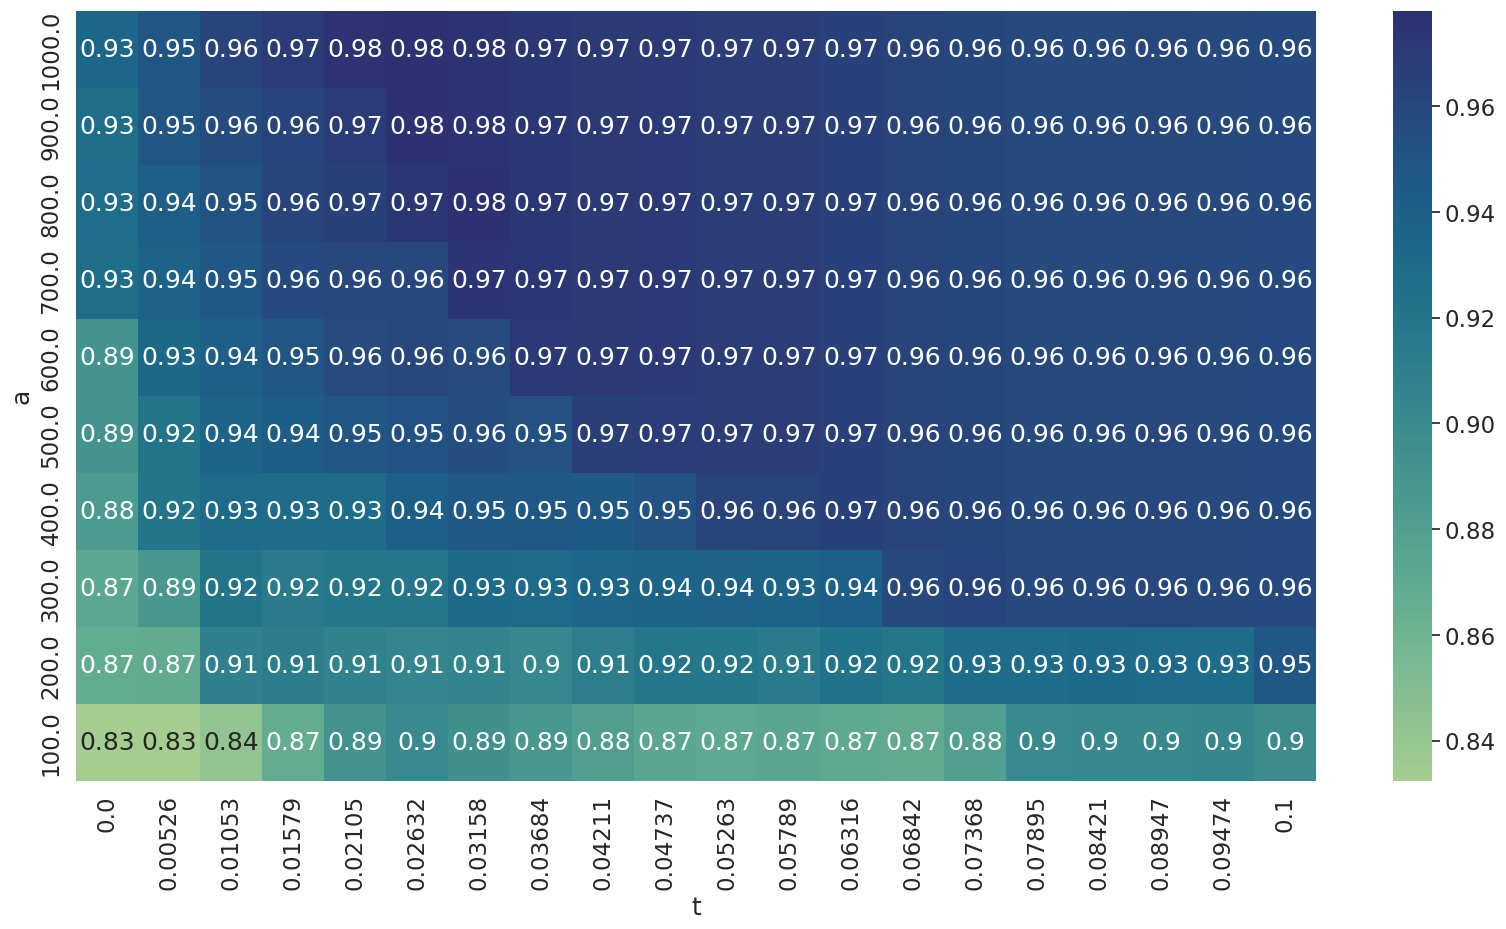

In [13]:
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score

df_email = clean_df_email(original_training_data)
model = LogisticRegression()

range_parameter = {'a': range(100, 1001, 100), 
                   't': np.round(np.linspace(0, 0.1, 20), 5)}
grid_parameter = ParameterGrid(range_parameter)

df_accuracy_parameter = pd.DataFrame(columns=['t', 'a', 'v'])

for g in grid_parameter:
    a = g['a']
    t = g['t']
    transform = EmailTransformer()
    X = transform.fit_transform(df_email, 
                                metric='conditional_probability', 
                                amount_words=a, 
                                selete_method='threshold_frequency', 
                                threshold_frequency=t)
    y = df_email['spam']

    accuracy_mean = np.round(np.mean(cross_val_score(model, X, y, cv=4)), 5)
    df_accuracy_parameter.loc[len(df_accuracy_parameter.index)] = [t, a, accuracy_mean] 
    # print(t, a, accuracy_mean)

fig, ax = plt.subplots(figsize=(20, 10))
df_pivot = df_accuracy_parameter.pivot(index='a', columns='t', values='v').sort_values(by='a', ascending=False)
sns.heatmap(df_pivot, annot=True, cmap="crest")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3: ROC Curve

In most cases we won't be able to get 0 false positives and 0 false negatives, so we have to compromise. For example, in the case of cancer screenings, false negatives are comparatively worse than false positives — a false negative means that a patient might not discover that they have cancer until it's too late, whereas a patient can just receive another screening for a false positive.

Recall that logistic regression calculates the probability that an example belongs to a certain class. Then, to classify an example we say that an email is spam if our classifier gives it $\ge 0.5$ probability of being spam. However, *we can adjust that cutoff*: we can say that an email is spam only if our classifier gives it $\ge 0.7$ probability of being spam, for example. This is how we can trade off false positives and false negatives.

The ROC curve shows this trade off for each possible cutoff probability. In the cell below, plot a ROC curve for your final classifier on the training data.

<!--
BEGIN QUESTION
name: q3
manual: True
points: 3
-->

Accuracy of the final model on the training data: 0.99821


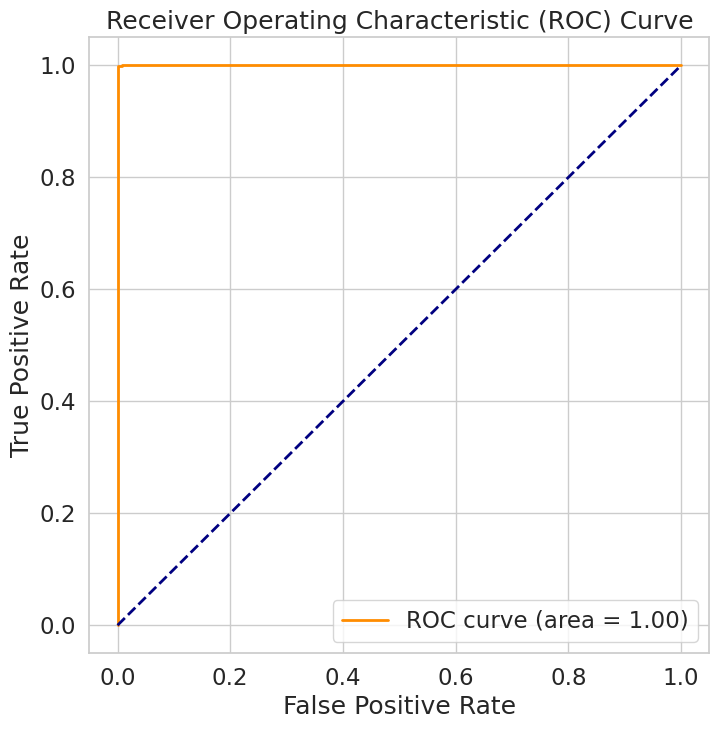

In [14]:
from sklearn.metrics import roc_curve, auc

df_email = clean_df_email(original_training_data)
transformer_final = EmailTransformer()
X = transformer_final.fit_transform(df_email, 
                            metric='conditional_probability', 
                            amount_words=1000, 
                            selete_method='threshold_frequency', 
                            threshold_frequency=0.02632)
y = df_email['spam']
model_final = LogisticRegression()
model_final.fit(X, y)
y_prob = model_final.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
print(f'Accuracy of the final model on the training data: {np.round(model_final.score(X, y), 5)}')

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Show words seleted.
transformer_final.get_words()

array(['rpm', 'wed', 'wrote', 'tue', 'cheers', 'gary', 'apt', 'aug',
       '(escapenumber)t(escapenumber)', 'jul', 'thu', 'install', 'chris',
       'sep', 'fri', 'comment', 'default', 'admin', 'perl', 'anyway',
       'writes', 'mailings', "wasn't", 'networks', 'seems', 'log',
       'archives', 'workers', 'guess', 'installed', 'looks', 'microsoft',
       'article', 'upgrade', 'pm', 'sun', "i'd", "'", 'lines', 'supplied',
       'os', 'cool', 'hardware', 'david', 'posted', 'images',
       'v(escapenumber)', 'particular', 'editor', 'hat', 'perhaps',
       'written', 'issues', 'root', 'url', "i've", 'running', 'stuff',
       'linux', 'built', 'useful', 'september', "i'm", 'interesting',
       '(escapenumber)pm', 'monday', 'seem', 'tech', 'ilug', 'sort',
       'users', 'august', 'org', 'groups', '(escapenumber)am', 'mon',
       'probably', 'date', 'mailman', 'pretty', 'update', 'story',
       'quite', "doesn't", 'fine', 'war', 'digital', 'guaranteed', 'file',
       'version', '

<!-- END QUESTION -->

# Question 4: Test Predictions

The following code will write your predictions on the test dataset to a CSV file. 

<!--
BEGIN QUESTION
name: q4
points: 3
-->

In [16]:
from datetime import datetime

test = preprocess_df_email(test)
X = transformer_final.transform(test)
test_predictions = model_final.predict(X)
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])

timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

## Congratulations! You have completed Project 2B!